In [9]:
# Loading important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Loading the training data

In [4]:
df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.518470,0.278526,1.573763,0.364948,1.091757,1,1
1,2.488967,0.277713,1.591735,0.341881,1.080555,1,1
2,2.488967,0.273645,1.573763,0.340290,1.075889,1,1
3,2.488967,0.265508,1.573763,0.323587,1.066555,1,1
4,2.439796,0.265508,1.573763,0.311655,1.049523,1,1


# Loading the two test datasets

In [5]:
df_test1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatestcopy.csv')
df_test1.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,2.204762,0.376814,1.566862,0.106940,1.207540,1,1
1,2.222275,0.384202,1.539680,0.145214,1.221461,1,1
2,2.233950,0.359575,1.516762,0.176881,1.209162,1,1
3,2.226653,0.316478,1.201302,0.194253,1.174139,1,1
4,2.257300,0.347262,1.180715,0.208776,1.211522,1,1


In [6]:
df_test2 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatest2copy.csv')
df_test2.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Week_day,Occupancy
0,0.742897,0.314074,1.509363,0.930527,0.814063,1,1
1,0.772291,0.280342,1.509363,0.830667,0.790653,1,1
2,0.750246,0.311334,1.493354,0.843289,0.815114,1,1
3,0.750246,0.311334,1.517368,0.862644,0.815114,1,1
4,0.772291,0.314074,1.509363,0.849741,0.831554,1,1


## Dividing the training data

In [7]:
class_name = "Occupancy"

In [10]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# preparing test data for model

In [11]:
class_name = "Occupancy"

attributes = [col for col in df.columns if col != class_name]
X_test1 = df_test1[attributes].values
y_test1 = df_test1[class_name]

In [12]:
class_name = "Occupancy"

attributes = [col for col in df.columns if col != class_name]
X_test2 = df_test2[attributes].values
y_test2 = df_test2[class_name]

# copy the above cells in every sheet

##### Data Partitioning

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# k Nearest Neighbor n = 5

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
y_pred = clf.predict(X_test)

In [17]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [18]:
y_pred_t1 = clf.predict(X_test1)

In [19]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [20]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Testset 1 results

In [21]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [22]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# k Nearest Neighbor n = 3

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [27]:
y_pred_t1 = clf.predict(X_test1)

In [28]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [29]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9934506753990995
F1-score [0.99584416 0.98455598]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Roc curve for trainingset

In [30]:
import scikitplot as skplt
import matplotlib.pyplot as plt


# k Nearest Neighbor n = 5

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [35]:
y_pred_t1 = clf.predict(X_test1)

In [36]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [37]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Testset 1 results

In [38]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [39]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# k Nearest Neighbor n = 5

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_pred = clf.predict(X_test)

In [43]:
y_pred

array([1, 0, 0, ..., 0, 1, 0])

## Doing prediction on testset data

In [44]:
y_pred_t1 = clf.predict(X_test1)

In [45]:
y_pred_t2 = clf.predict(X_test2)

# Trainingset results

In [46]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
y_score = clf.predict_proba(X_test)

Accuracy 0.9926320098239869
F1-score [0.99531981 0.98269231]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



# Testset 1 results

In [47]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [48]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# Scikit-plot


In [1]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

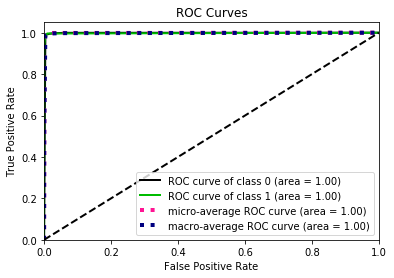

In [50]:
plot_roc(y_test, y_score)
plt.show()

In [ ]:
plot_lift_curve()

# Testset 1 results

In [51]:
print('Accuracy %s' % accuracy_score(y_test1, y_pred_t1))
print('F1-score %s' % f1_score(y_test1, y_pred_t1, average=None))
print(classification_report(y_test1, y_pred_t1))

Accuracy 0.950844277673546
F1-score [0.96172948 0.93130572]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1693
           1       0.95      0.91      0.93       972

    accuracy                           0.95      2665
   macro avg       0.95      0.94      0.95      2665
weighted avg       0.95      0.95      0.95      2665



# Testset 2 results

In [52]:
print('Accuracy %s' % accuracy_score(y_test2, y_pred_t2))
print('F1-score %s' % f1_score(y_test2, y_pred_t2, average=None))
print(classification_report(y_test2, y_pred_t2))

Accuracy 0.9854388843314192
F1-score [0.99075039 0.96579961]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.95      0.98      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.98      0.98      9752
weighted avg       0.99      0.99      0.99      9752



# Trying scaled data to see the results

In [53]:
df = pd.read_csv("procced_datatrainingcopy.csv")
class_name = "Occupancy"
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

FileNotFoundError: [Errno 2] File procced_datatrainingcopy.csv does not exist: 'procced_datatrainingcopy.csv'

In [ ]:
class_name = "Occupancy"

In [ ]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

# k Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

# Testset results

In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# Trainingset 1 results

In [ ]:
df = pd.read_csv("scaled_datatestcopy.csv")

class_name = "Occupancy"
attributes = [col for col in df.columns if col != class_name]
X_test01 = df[attributes].values
y_test02 = df[class_name]



In [ ]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform') #test con k=1 e weight uniform
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance') #k = 3 and weight distance
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_neighbors': np.arange(1, 10 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

In [ ]:
clf = search.best_estimator_

This is where you store the best model that you got by applying GridSearchCV

### An example from sklearn

In [ ]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

n_neighbors = 5

# import some data to play with
df = pd.read_csv('scaled_datatrainingcopy.csv')

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
class_name = "Occupancy"
#attributes = [col for col in df.columns if col != class_name]
attributes = ['Temperature', 'Light']
X = df[attributes].values
y = df[class_name]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ListedColormap(['black', 'white'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
attributes = [col for col in df.columns if col != class_name]

In [ ]:
attributes